In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
from keras.layers import Conv2D,Dense,Flatten
import cv2
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt


2024-04-20 07:30:05.925441: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 07:30:05.925504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 07:30:05.926981: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:

import warnings
import re

warnings.filterwarnings("ignore", message="^.*GPU.*$")
warnings.filterwarnings("ignore")


In [3]:
x=[]
y=[]

In [4]:
labels=os.listdir('/kaggle/input/sentiment-images-classifier/6 Emotions for image classification')
labels

['fear', 'sad', 'pain', 'disgust', 'happy', 'anger']

In [5]:
master='/kaggle/input/sentiment-images-classifier/6 Emotions for image classification'
for folder in os.listdir(master):
    folder_path=os.path.join(master,folder)
    label=folder
    for image_name in os.listdir(folder_path):
        image_path=os.path.join(folder_path,image_name)
        img=cv2.imread(image_path)
        img=cv2.resize(img,(224,224))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        x.append(np.round(img/255,4))
        y.append(label)

In [6]:
x=np.array(x)
y=np.array(y)

In [7]:
x.shape,y.shape

((1200, 224, 224, 3), (1200,))

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [9]:
labels=le.classes_
labels

array(['anger', 'disgust', 'fear', 'happy', 'pain', 'sad'], dtype='<U7')

In [10]:
y

array([2, 2, 2, ..., 0, 0, 0])

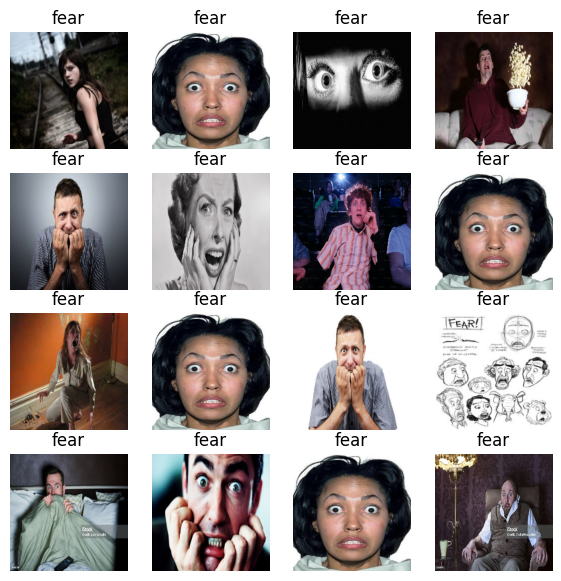

In [11]:
idx=np.random.random_integers(0,59,16)
plt.figure(figsize=(7,7))
for k in range(16):
    i=idx[k]
    plt.subplot(4,4,k+1)
    plt.imshow(x[i])
    plt.title(labels[int(y[i])])
    plt.axis('off')
plt.show()


In [56]:
VGG16??

Signature:
VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)
Source:   
@keras_export(["keras.applications.vgg16.VGG16", "keras.applications.VGG16"])
def VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
):
    """Instantiates the VGG16 model.

    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)

    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).

    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).

    The default input size for this m

In [13]:
from keras.applications.vgg16 import VGG16
vgg=VGG16()


In [14]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model=keras.Sequential()
for layer in vgg.layers[:-2]:
    model.add(layer)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,479,232 (448.15 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 117,479,232 (448.15 MB)

In [28]:
for layer in model.layers:
    layer.trainable=False

In [29]:
model.add(Dense(2048,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │        12,294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,882,182 (480.20 MB)

 Trainable params: 8,402,950 (32.05 MB)

 Non-trainable params: 117,479,232 (448.15 MB)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)
x_validation,x_test,y_validation,y_test=train_test_split(x_test,y_test,test_size=0.5,shuffle=True)

In [32]:
y_train

array([3, 4, 4, 5, 2, 4, 2, 5, 3, 5, 1, 5, 1, 4, 5, 1, 0, 2, 0, 5, 0, 1,
       3, 3, 0, 1, 3, 2, 1, 4, 5, 5, 2, 0, 0, 3, 5, 3, 1, 0, 1, 0, 2, 0,
       0, 1, 0, 5, 0, 0, 0, 0, 2, 0, 4, 5, 3, 0, 1, 1, 0, 0, 3, 2, 3, 4,
       1, 5, 3, 2, 0, 0, 5, 5, 5, 1, 0, 5, 1, 3, 0, 3, 1, 5, 5, 0, 5, 1,
       1, 2, 4, 1, 2, 1, 4, 2, 5, 2, 5, 0, 1, 5, 2, 4, 5, 3, 0, 2, 3, 4,
       5, 1, 3, 1, 0, 5, 3, 5, 4, 2, 0, 3, 0, 3, 2, 4, 3, 4, 2, 5, 1, 4,
       2, 0, 0, 1, 1, 5, 3, 3, 3, 4, 2, 4, 0, 2, 1, 3, 3, 4, 0, 0, 3, 2,
       2, 5, 3, 4, 1, 2, 0, 1, 1, 0, 1, 1, 5, 5, 1, 2, 0, 0, 1, 1, 4, 2,
       3, 0, 5, 5, 4, 4, 4, 1, 1, 1, 3, 1, 5, 1, 1, 0, 1, 3, 1, 5, 3, 3,
       0, 3, 5, 5, 4, 3, 1, 5, 3, 5, 0, 4, 2, 1, 4, 0, 4, 3, 1, 4, 0, 3,
       0, 4, 2, 0, 5, 3, 5, 4, 1, 3, 2, 1, 4, 4, 0, 4, 1, 1, 1, 4, 1, 1,
       1, 1, 3, 3, 4, 1, 4, 1, 1, 5, 1, 1, 1, 0, 1, 2, 5, 4, 3, 4, 0, 5,
       3, 5, 0, 5, 0, 4, 3, 3, 5, 2, 3, 3, 5, 3, 1, 1, 1, 0, 0, 5, 2, 1,
       0, 3, 0, 3, 1, 2, 3, 4, 3, 0, 4, 1, 1, 2, 3,

In [33]:
x_train.shape,y_train.shape

((840, 224, 224, 3), (840,))

In [34]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['Accuracy'])

In [35]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
 2/27 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - Accuracy: 0.1797 - loss: 15.7047

W0000 00:00:1713598415.103280     588 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - Accuracy: 0.1706 - loss: 21.4814

W0000 00:00:1713598418.578519     588 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - Accuracy: 0.1717 - loss: 21.1775 - val_Accuracy: 0.2000 - val_loss: 2.8438
Epoch 2/100
 1/27 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - Accuracy: 0.2500 - loss: 2.3311

W0000 00:00:1713598419.312487     588 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - Accuracy: 0.2959 - loss: 2.1348 - val_Accuracy: 0.3056 - val_loss: 2.2369
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - Accuracy: 0.3380 - loss: 1.9628 - val_Accuracy: 0.2333 - val_loss: 2.5774
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - Accuracy: 0.3791 - loss: 1.9866 - val_Accuracy: 0.2056 - val_loss: 4.1192
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - Accuracy: 0.3552 - loss: 2.2210 - val_Accuracy: 0.3889 - val_loss: 2.2682
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - Accuracy: 0.4832 - loss: 1.5539 - val_Accuracy: 0.3000 - val_loss: 2.7573
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - Accuracy: 0.4903 - loss: 1.6400 - val_Accuracy: 0.2389 - val_loss: 2.3844
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - Accuracy: 0.4127 - loss: 1.6626 - val_Accuracy: 0.3889 - val_loss: 2.0592
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - Accuracy: 0.4969 - loss: 1.3960 - val_Accuracy: 0.3667 - val_l

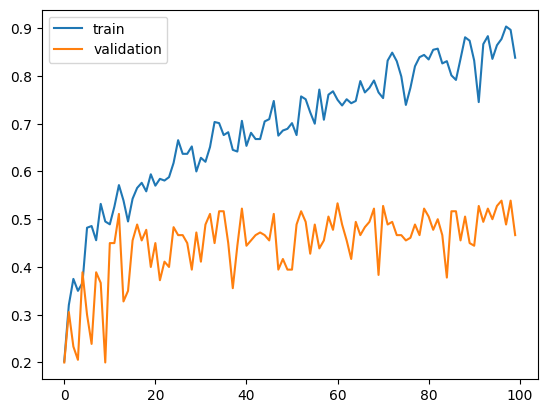

In [36]:
plt.plot(history.history['Accuracy'],label='train')
plt.plot(history.history['val_Accuracy'],label='validation')
plt.legend()
plt.show()

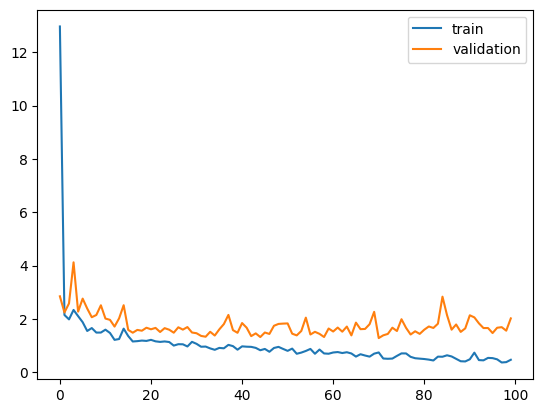

In [37]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [48]:
y_pred=model.predict_on_batch(x_test)

y_pred2=[np.argmax(x) for x in y_pred]
accuracy=sklearn.metrics.accuracy_score(y_test,y_pred2)
accuracy

0.35

In [84]:
model2=keras.Sequential()
for layer in vgg.layers[:-4]:
    model2.add(layer)
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [85]:
for layer in model2.layers:
    layer.trainable=False

In [62]:
VGG16??

Signature:
VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)
Source:   
@keras_export(["keras.applications.vgg16.VGG16", "keras.applications.VGG16"])
def VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
):
    """Instantiates the VGG16 model.

    Reference:
    - [Very Deep Convolutional Networks for Large-Scale Image Recognition](
    https://arxiv.org/abs/1409.1556) (ICLR 2015)

    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).

    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).

    The default input size for this m

In [86]:
model2.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
model2.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
model2.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))
model2.add(Flatten())
model2.add(Dense(2048,activation='relu'))
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(6,activation='sigmoid'))

In [87]:
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2048)           │     9,439,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │         6,15

 Total params: 30,977,862 (118.17 MB)

 Trainable params: 16,263,174 (62.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [88]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['Accuracy'])

In [89]:
history2=model2.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation),batch_size=48)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - Accuracy: 0.2045 - loss: 3.9405

W0000 00:00:1713601045.459477     590 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 413ms/step - Accuracy: 0.2059 - loss: 3.8738 - val_Accuracy: 0.1722 - val_loss: 1.8408
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - Accuracy: 0.2514 - loss: 1.7011 - val_Accuracy: 0.2278 - val_loss: 1.7404
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - Accuracy: 0.2829 - loss: 1.6360 - val_Accuracy: 0.3278 - val_loss: 1.7666
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - Accuracy: 0.4161 - loss: 1.4684 - val_Accuracy: 0.3500 - val_loss: 1.6001
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - Accuracy: 0.5030 - loss: 1.3261 - val_Accuracy: 0.4000 - val_loss: 1.6052
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - Accuracy: 0.5523 - loss: 1.2439 - val_Accuracy: 0.4389 - val_loss: 1.4260
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - Accuracy: 0.6515 - loss: 0.9813 - val_Accuracy: 0.5222 - val_loss: 1.4725
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - Accuracy: 0.7247 - loss: 0.7614 - val_Accuracy: 0.450

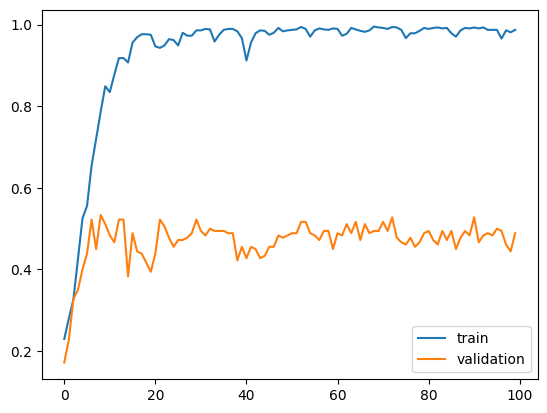

In [90]:
plt.plot(history2.history['Accuracy'],label='train')
plt.plot(history2.history['val_Accuracy'],label='validation')
plt.legend()
plt.show()

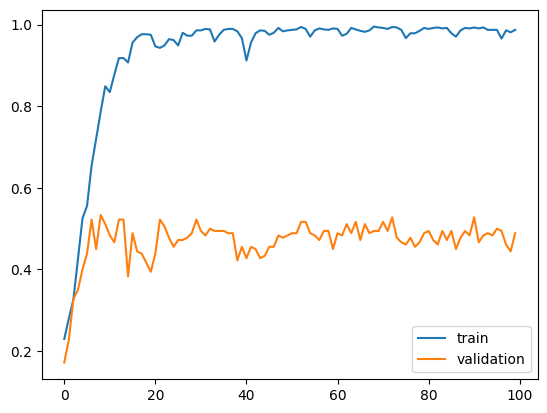

In [91]:
plt.plot(history2.history['Accuracy'],label='train')
plt.plot(history2.history['val_Accuracy'],label='validation')
plt.legend()
plt.show()

In [92]:
y_pred=model2.predict_on_batch(x_test)

y_pred2=[np.argmax(x) for x in y_pred]
accuracy=sklearn.metrics.accuracy_score(y_test,y_pred2)
accuracy

W0000 00:00:1713601288.842625     590 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


0.45555555555555555